In [59]:

import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly
import statistics
import plotly.express as px
import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
import plotly.express as px
import datetime
import datetime as dt
import time
import django.template.backends.jinja2


cmap = sns.diverging_palette(220, 15, as_cmap=True)


# Supress Scientific notation in python
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display all columns of long dataframe
pd.set_option('display.max_columns', None)

#open file
recovered='recovered_de.csv'
df=pd.read_csv(recovered)
#print(df)



In [61]:
#parse index
df['date']=pd.to_datetime(df['date'], infer_datetime_format=True)
indexeddf=df.set_index(['date'])
#print(indexeddf)

#parsing to time format and extracting dates 
x=df['Date']=pd.to_datetime(df['date'], format='%d-%m-%y')

Day=df['date'].dt.day_name()
Month=df['date'].dt.month_name()
Year=df['date'].dt.year

df['Year']=df['date'].dt.year
df['Month']=df['date'].dt.month_name()
df['Day']=df['date'].dt.day_name()
#print(df)


# Indexes for recovered

In [52]:
base_color = sns.color_palette()[0]
state_order = df['state'].value_counts().index
recovered_order=df['recovered'].value_counts().index
month_order=df['Month'].value_counts().index
day_order=df['Day'].value_counts().index
date_order = df['date'].value_counts().index
gender_order = df['gender'].value_counts().index

# Recovered states

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 <a list of 9 Text xticklabel objects>)

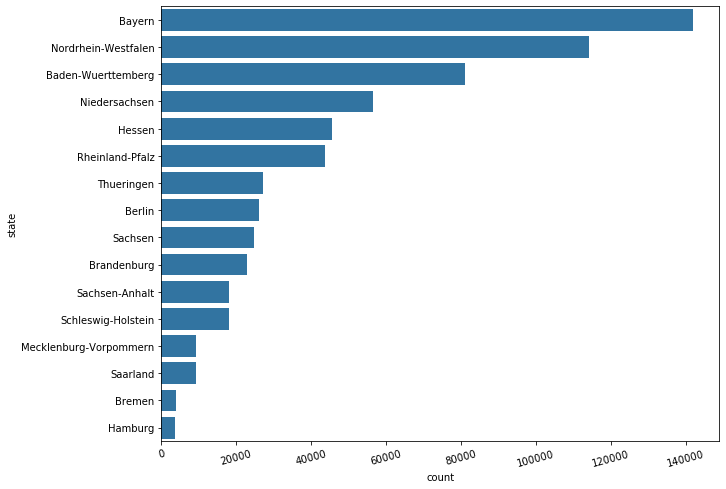

In [75]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,y='state',color=base_color,order=state_order)
plt.xticks(rotation=15)

In [53]:
domain_counts = df.groupby(['state', 'Month']).size()
domain_counts = domain_counts.reset_index(name='count')
domain_counts = domain_counts.pivot(index = 'state', columns = 'Month', values = 'count')
domain_counts.head()

Month,April,August,December,February,January,July,June,March,May,November,October,September
state,,,,,,,,,,,,
Baden-Wuerttemberg,6251,2821,12915,7944,10813,1332,742,12394,1828,11495,8441,4161
Bayern,10294,3647,25280,14123,20826,1764,956,20526,2801,22890,13070,5745
Berlin,1546,1057,3733,2629,3391,708,909,3460,698,3597,2878,1369
Brandenburg,1017,255,4443,3002,4466,134,157,3280,247,3472,2110,379
Bremen,208,129,520,477,466,91,145,520,227,526,396,176


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text xticklabel objects>)

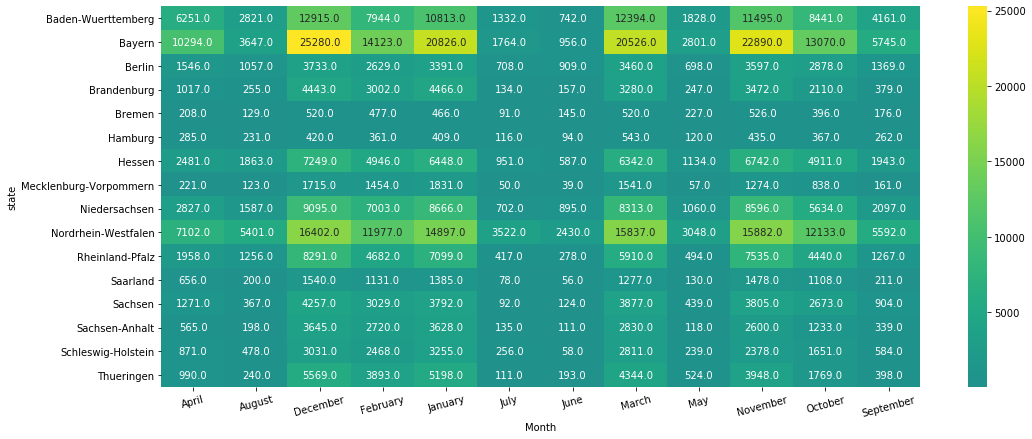

In [54]:
plt.figure(figsize=(17,7))
sns.heatmap(domain_counts, fmt = '.1f',annot = True, cmap = 'viridis', center = 0)
plt.xticks(rotation=15)

In [71]:
day_counts = df.groupby(['state', 'Day']).size()
day_counts = day_counts.reset_index(name='count')
day_counts = day_counts.pivot(index = 'state', columns = 'Day', values = 'count')
domain_counts.head()

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
state,,,,,,,
Baden-Wuerttemberg,12762,9717,11590,8266,13041,12648,13113
Bayern,22073,16881,18894,14494,23061,22784,23735
Berlin,4203,4173,2615,1586,4400,4494,4504
Brandenburg,3662,3019,2869,1893,3779,3933,3807
Bremen,603,424,564,418,629,608,635


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

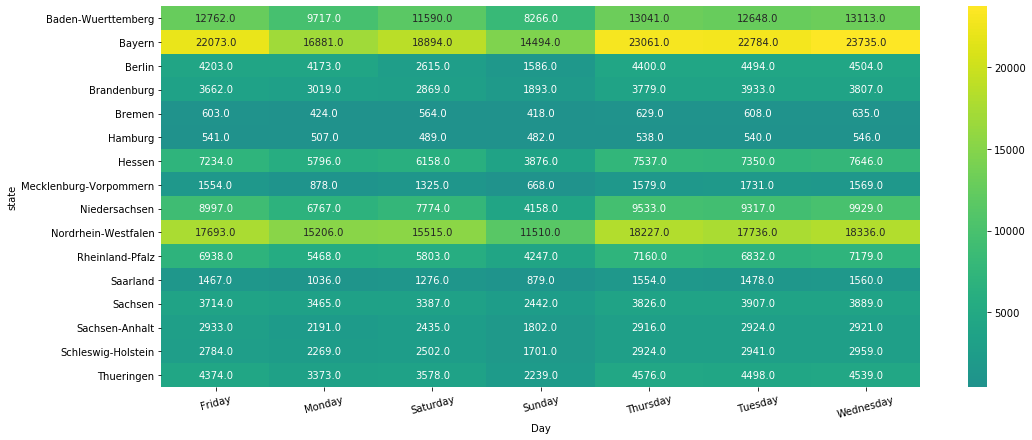

In [73]:
plt.figure(figsize=(17,7))
sns.heatmap(day_counts, fmt = '.1f',annot = True, cmap = 'viridis', center = 0)
plt.xticks(rotation=15)